In [1]:
import pandas as pd
import seaborn as sns
import navigation as nav
import yfinance as yf
import matplotlib.pyplot as plt
from io import StringIO

In [2]:
url = nav.all_datasets['webscraping']['S&P500']
collected = pd.read_html(url, header=0)
print(len(collected))

2


In [3]:
stocks = pd.DataFrame(collected[0])
print(stocks.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 503 entries, 0 to 502
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Symbol                 503 non-null    object
 1   Security               503 non-null    object
 2   GICS Sector            503 non-null    object
 3   GICS Sub-Industry      503 non-null    object
 4   Headquarters Location  503 non-null    object
 5   Date added             503 non-null    object
 6   CIK                    503 non-null    int64 
 7   Founded                503 non-null    object
dtypes: int64(1), object(7)
memory usage: 31.6+ KB
None


In [4]:
unique_sectors = stocks['GICS Sector'].unique()
for i in unique_sectors:
    print(i)
print('\n', len(unique_sectors))

Industrials
Health Care
Information Technology
Utilities
Financials
Materials
Consumer Discretionary
Real Estate
Communication Services
Consumer Staples
Energy

 11


In [5]:
sector = stocks.groupby('GICS Sector')

In [6]:
sector.first()

,Symbol,Security,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
GICS Sector,,,,,,,
Communication Services,GOOGL,Alphabet Inc. (Class A),Interactive Media & Services,"Mountain View, California",2014-04-03,1652044,1998
Consumer Discretionary,ABNB,Airbnb,"Hotels, Resorts & Cruise Lines","San Francisco, California",2023-09-18,1559720,2008
Consumer Staples,MO,Altria,Tobacco,"Richmond, Virginia",1957-03-04,764180,1985
Energy,APA,APA Corporation,Oil & Gas Exploration & Production,"Houston, Texas",1997-07-28,1841666,1954
Financials,AFL,Aflac,Life & Health Insurance,"Columbus, Georgia",1999-05-28,4977,1955
Health Care,ABT,Abbott Laboratories,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
Industrials,MMM,3M,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
Information Technology,ACN,Accenture,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989
Materials,APD,Air Products,Industrial Gases,"Upper Macungie Township, Pennsylvania",1985-04-30,2969,1940


In [7]:
sector.describe()

CIK                                                   \
                       count          mean            std      min        25%   
GICS Sector                                                                     
Communication Services  22.0  1.150190e+06  503816.763824  29989.0  833146.75   
Consumer Discretionary  50.0  9.379188e+05  427268.166249  37996.0  824118.00   
Consumer Staples        38.0  4.932800e+05  659308.763424   7084.0   27947.75   
Energy                  22.0  9.111103e+05  664879.244209   4447.0   96873.25   
Financials              73.0  7.543031e+05  564647.731838   4962.0   80661.00   
Health Care             61.0  8.441568e+05  549160.963686   1800.0  313616.00   
Industrials             78.0  7.377583e+05  628383.327630   4281.0   79229.75   
Information Technology  69.0  9.123996e+05  495663.864776   2488.0  769397.00   
Materials               28.0  8.470378e+05  713987.434946   2969.0   67840.25   
Real Estate             31.0  9.564368e+05  373794.645688  34903.0  892604.00   
Utilities               31.0  8.730384e+05  477431.209001   4904.0  742555.00   

                                                          
                              50%         75%        max  
GICS Sector                                               
Communication Services  1225195.0  1564708.00  1754301.0  
Consumer Discretionary   943392.5  1173694.00  1590895.0  
Consumer Staples          78950.0   929235.25  1996862.0  
Energy                  1037343.0  1509298.00  1841666.0  
Financials               895421.0  1140536.00  2012383.0  
Health Care              885725.0  1100682.00  1964738.0  
Industrials              794698.0  1228521.00  1996810.0  
Information Technology   898293.0  1327567.00  1730168.0  
Materials                915994.5  1419355.00  2005951.0  
Real Estate             1034054.0  1067255.50  1705696.0  
Utilities                922224.0  1078609.50  1868275.0

In [8]:
sector.get_group('Health Care')

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
9,A,Agilent Technologies,Health Care,Life Sciences Tools & Services,"Santa Clara, California",2000-06-05,1090872,1999
15,ALGN,Align Technology,Health Care,Health Care Supplies,"Tempe, Arizona",2017-06-19,1097149,1997
32,AMGN,Amgen,Health Care,Biotechnology,"Thousand Oaks, California",1992-01-02,318154,1980
...,...,...,...,...,...,...,...,...
473,VTRS,Viatris,Health Care,Pharmaceuticals,"Pittsburgh, Pennsylvania",2004-04-23,1792044,1961
486,WAT,Waters Corporation,Health Care,Life Sciences Tools & Services,"Milford, Massachusetts",2002-01-02,1000697,1958
490,WST,West Pharmaceutical Services,Health Care,Health Care Supplies,"Exton, Pennsylvania",2020-05-22,105770,1923
501,ZBH,Zimmer Biomet,Health Care,Health Care Equipment,"Warsaw, Indiana",2001-08-07,1136869,1927


In [9]:
tickers=list(stocks.Symbol)

In [19]:
# for documentation -> https://pypi.org/project/yfinance/

def get_data(y1, y2):
    data = yf.download(
        tickers=tickers,
        start=y1,
        end=y2,
        interval='1d',
        group_by='ticker',
        auto_adjust=True,
        prepost=True,
        threads=True,
        proxy=None
    )
    return data
data = get_data('2020-1-1', '2024-1-1')

[*********************100%***********************]  503 of 503 completed

5 Failed downloads:
['SOLV', 'GEV', 'SW']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-1-1 -> 2024-1-1) (Yahoo error = "Data doesn\'t exist for startDate = 1577854800, endDate = 1704085200")')
['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; no price data found  (1d 2020-1-1 -> 2024-1-1)')
['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


In [20]:
data['AAPL'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1006 entries, 2020-01-02 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1006 non-null   float64
 1   High    1006 non-null   float64
 2   Low     1006 non-null   float64
 3   Close   1006 non-null   float64
 4   Volume  1006 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 47.2 KB


In [12]:
# selecting a stock
df = pd.DataFrame(data['AAPL'].Close)
df['Date'] = df.index
df

,Close,Date
Date,,
2023-01-03,123.768440,2023-01-03
2023-01-04,125.045052,2023-01-04
2023-01-05,123.718971,2023-01-05
2023-01-06,128.271103,2023-01-06
2023-01-09,128.795609,2023-01-09
...,...,...
2023-12-22,192.656174,2023-12-22
2023-12-26,192.108871,2023-12-26
2023-12-27,192.208359,2023-12-27


Text(0, 0.5, 'Closing Price')

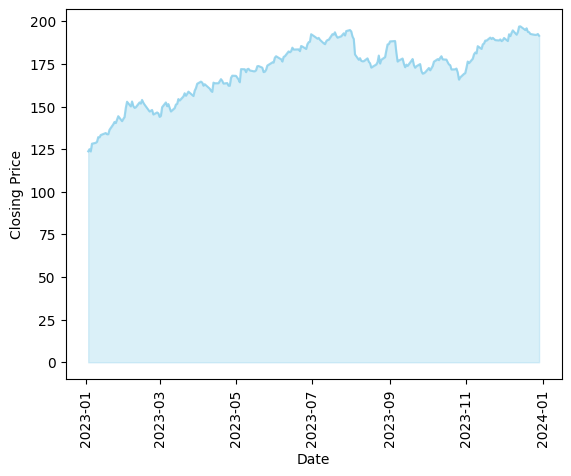

In [13]:
# Defining the plot
plt.fill_between(df.Date, df.Close, color='skyblue', alpha=0.3)
plt.plot(df.Date, df.Close, color='skyblue', alpha=0.8)
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Closing Price")

In [14]:
# custom function to call the symbols
def price_plot(symbol):
    df = pd.DataFrame(data[symbol].Close)
    df['Date'] = df.index
    plt.fill_between(df.Date, df.Close, color='skyblue', alpha=0.3)
    plt.plot(df.Date, df.Close, color='skyblue', alpha=0.8)
    plt.xticks(rotation=90)
    plt.xlabel("Date", fontweight='bold')
    plt.ylabel("Closing Price", fontweight='bold')
    return plt.show()

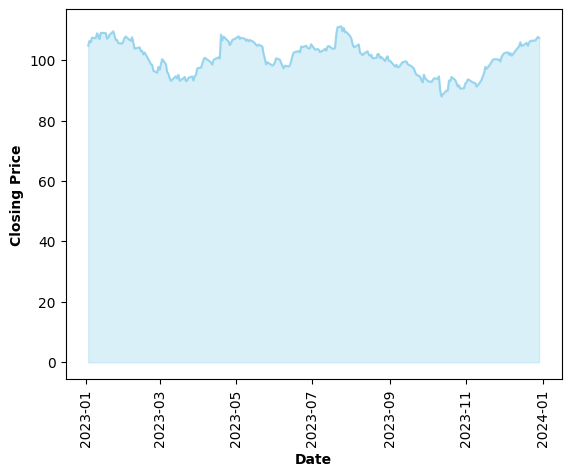

In [15]:
price_plot('ABT')

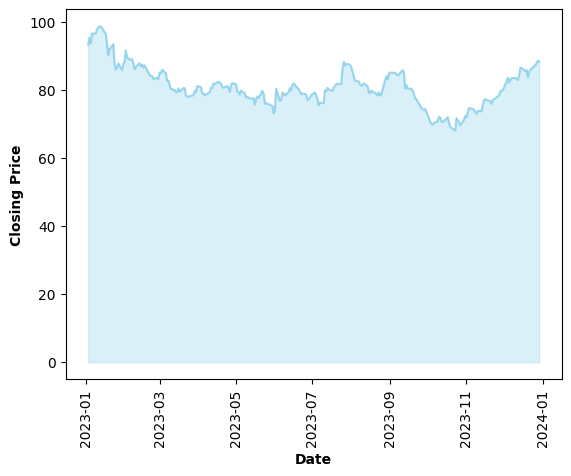

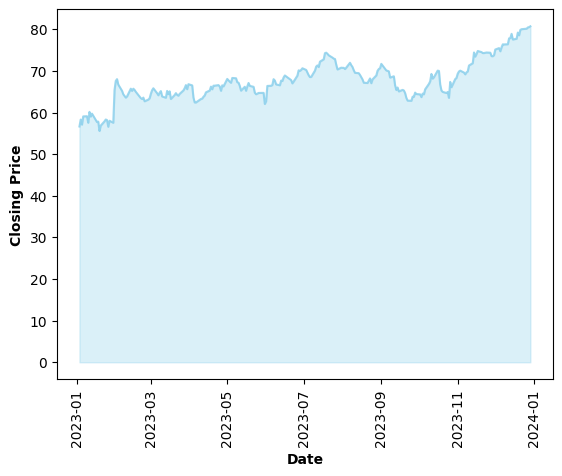

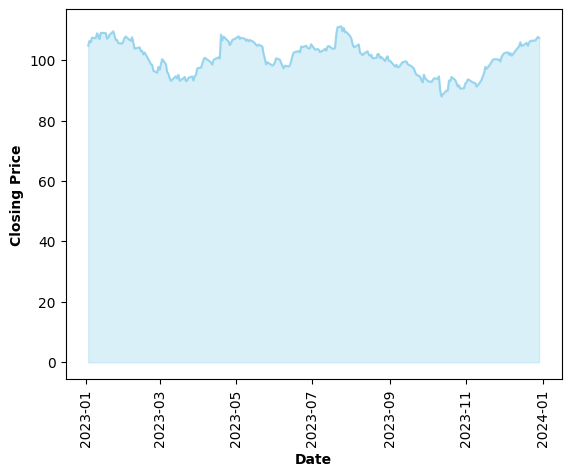

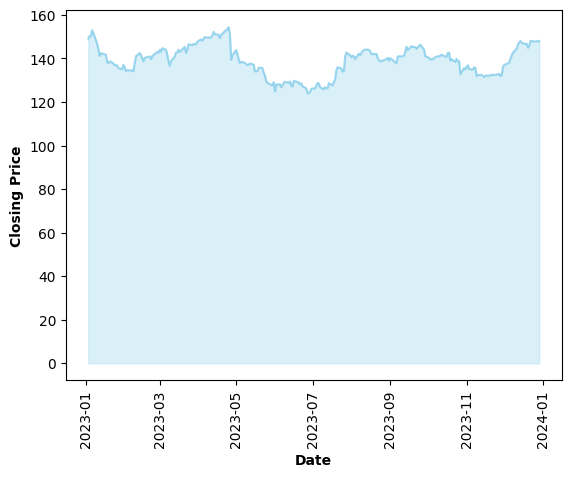

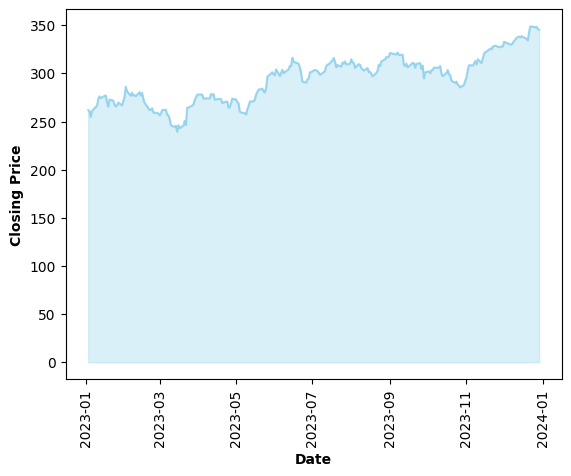

In [16]:
for i in tickers[:5]:
    price_plot(i)